# A Problem in Probability

* Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor. What is the probability that the needle will lie across a line between two strips? ()

In [1]:
import numpy as np #some mathematical and numerical tools
import matplotlib.pyplot as pl #ploting tools
import random as rd #random number generator

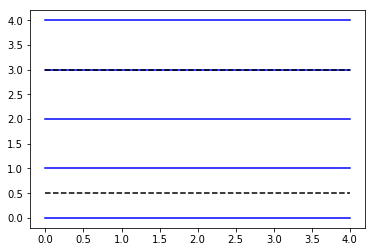

In [2]:
x=np.linspace(0,4,100)
y=np.zeros(100)
pl.plot(x,y,color='blue')
pl.plot(x,y+0.5,linestyle="--",color='black')
pl.plot(x,y+1,color='blue')
pl.plot(x,y+2,color='blue')
pl.plot(x,y+3,color='blue')
pl.plot(x,y+3,linestyle="--",color='black')
pl.plot(x,y+4,color='blue')
pl.show()

Now, in a particular case we suppose that the needle length l is equal to the width t of the strips.

In [3]:
def needle(y_min,y_max):
    y = rd.uniform(y_min, y_max)
    theta= rd.uniform(0.0,np.pi/2)
    return [y,theta]

def check(args,l):
    y=args[0]
    theta=args[1]
    y1=y+(l/2)*np.sin(theta)
    y2=y-(l/2)*np.sin(theta)
    state=False
    if (y1 >round(y) and y2<round(y)):
        state=True
    return state

def run(N,l,ymin,ymax):
    n_hits = 0
    for i in range(N):
        yt=needle(ymin,ymax)
        if check(yt,l)==True:
            n_hits += 1
    return n_hits

In [5]:
N=100000
nh=run(N,1,0.5,3.0)
print(nh/N)

0.635


In [26]:
def Ens(N1,N2,l,ymin,ymax):
    result=0
    for i in range(N1):
        result=result+(run(N2,l,ymin,ymax)/N2)
    return result/N1

In [17]:
Ens(100,5000,1,0.5,3.0)

0.6366959999999999

In [28]:
ls=np.linspace(0.0,1.0,10)
p_cut=[]
N_ens=100
N_run=500
ymin=0.5
ymax=3.0
for l in ls:
    p=Ens(N_ens,N_run,l,ymin,ymax)
    p_cut.append(p)
    print(l,p)

0.0 0.0
0.1111111111111111 0.07175999999999996
0.2222222222222222 0.14424000000000003
0.3333333333333333 0.21162000000000014
0.4444444444444444 0.28178000000000003
0.5555555555555556 0.35229999999999995
0.6666666666666666 0.4202800000000002
0.7777777777777777 0.49944000000000005
0.8888888888888888 0.5642800000000002
1.0 0.6311600000000002


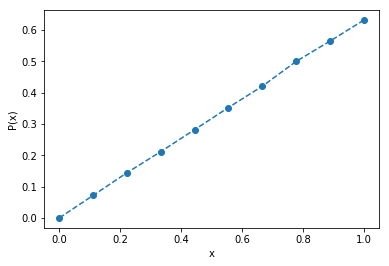

In [37]:
#x=l/t , t=1 => x=l
p_cut=np.array(p_cut)
pl.plot(ls,p_cut,linestyle='--',marker='o')
pl.xlabel('x')
pl.ylabel('P(x)')
pl.show()

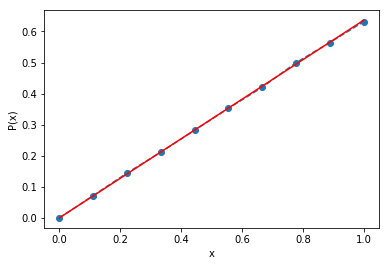

In [39]:
alpha=0.636
pl.plot(ls,p_cut,linestyle='--',marker='o')
pl.plot(ls,alpha*ls,color='red')
pl.xlabel('x')
pl.ylabel('P(x)')
pl.show()

In [36]:
2/np.pi

0.6366197723675814

### $P(x)= \frac{2}{\pi} \times x$  for  $0<x<1$

## Buffon's needle problem

In mathematics, Buffon's needle problem is a question first posed in the 18th century by Georges-Louis Leclerc, Comte de Buffon:

    Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor. What is the probability that the needle will lie across a line between two strips?

Buffon's needle was the earliest problem in geometric probability to be solved; it can be solved using integral geometry. The solution for the sought probability p, in the case where the needle length l is not greater than the width t of the strips, is

$p=\frac{2}{\pi} \frac{l}{t}$

[from wikipedia](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem)

[wolfram](https://mathworld.wolfram.com/BuffonsNeedleProblem.html)